Levanto librerias y funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import square, sawtooth
from scipy.integrate import quad
from math import* # import all function from math

## Serie de Fourier

Ejemplo de construccion de una senal utilizando la serie de Fourier

### Forma compleja
$f(x) = \sum_{k=-\infty}^{\infty} F_k \mathrm{e}^{jk\omega_0t}$  

$ F_k = \frac{1}{T_{0}} \int_{T_{0}} f(x)\mathrm{e}^{-jk\omega_0t}\mathrm{d}t $

### Forma trigonometrica

$ f(t) = A_{0} + \sum_{k=1}^{\infty} (A_k cos({k\omega_0t}) + B_k sin({k\omega_0t})) $

$ A_0 = \frac{1}{T_0} \int_{T_0} f(x)\mathrm{d}x $

$ A_k= \frac{2}{T_0} \int_{T_0} f(x)*cos(k\omega_0t)\mathrm{d}t $

$ B_k= \frac{2}{T_0} \int_{T_0} f(x)*sin(k\omega_0t)\mathrm{d}t $


Definiciond de una senal

In [2]:
#Defino un vector x entre –π to +π
t=np.arange(-3*np.pi,3*np.pi,0.001)

# Genera una senal cuadrada utilizando scipy
#y=square(t)

# Senal diente de sierra
offset = 5
y = (sawtooth(t) + offset)

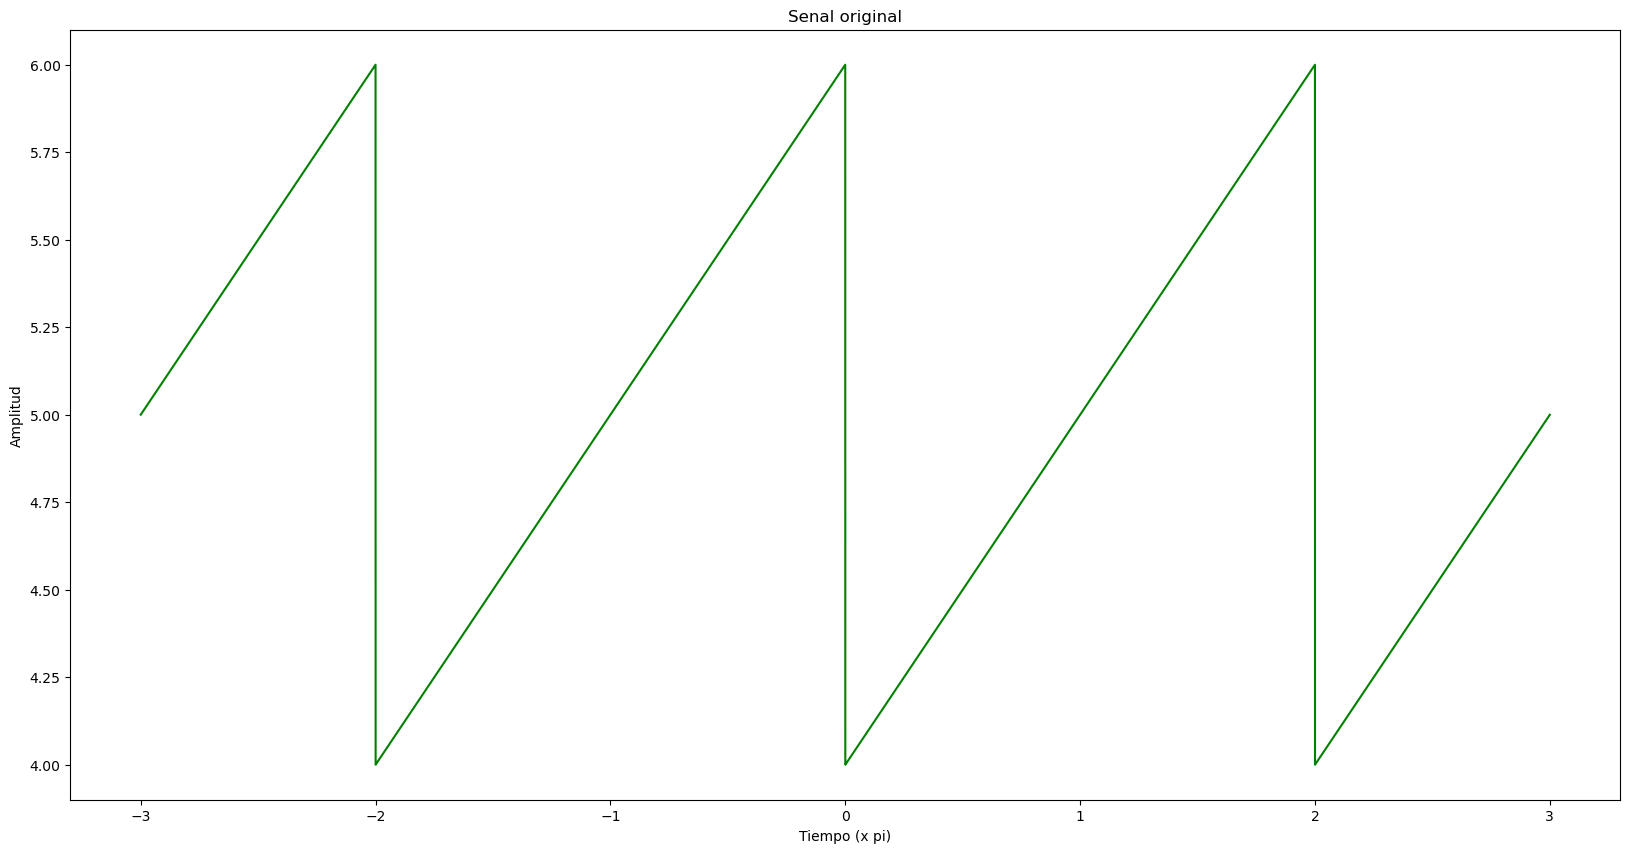

In [3]:
fig1, ax1 = plt.subplots(1,1)
fig1.set_size_inches(20, 10)
ax1.plot(t/(np.pi),y,'g')
ax1.set_title("Senal original")
ax1.set_xlabel("Tiempo (x pi)")
ax1.set_ylabel("Amplitud")
plt.show()

Se computa la serie de Fourier

In [4]:
#Cantidad de terminos incluidos en la sumatoria
n=30

An=[] #defining array
Bn=[]

sum=0

#Funciones utilziadas para el calculo de A0, An y Bn
#forig = lambda t:(square(t))
#fc=lambda t:square(t)*cos(i*t)  #i :dummy index
#fs=lambda t:square(t)*sin(i*t)

#Funciones utilziadas para el calculo de A0, An y Bn
forig = lambda t:(sawtooth(t) + offset)
fc=lambda t:(sawtooth(t) + offset)*cos(i*t)  #i :dummy index
fs=lambda t:(sawtooth(t) + offset)*sin(i*t)

#Se obtiene el termino A0
a0=quad(forig,-np.pi,np.pi)[0]*(1.0/(2*np.pi))

#An.append(0)
#Bn.append(0)

#Se obtiene el termino An
for i in range(1,n):
 an=quad(fc,-np.pi,np.pi)[0]*(1.0/np.pi)
 An.append(an)

#Se obtiene el termino Bn
for i in range(1,n):
 bn=quad(fs,-np.pi,np.pi)[0]*(1.0/np.pi)
 Bn.append(bn)

#for i in range(n):
#  sum=sum+a0+(An[i]*np.cos(i*t)+Bn[i]*np.sin(i*t))
for i in range(n):
 if i==0.0:
    sum=[a0]*len(t)
 else:
    sum=sum+(An[i-1]*np.cos(i*t)+Bn[i-1]*np.sin(i*t))

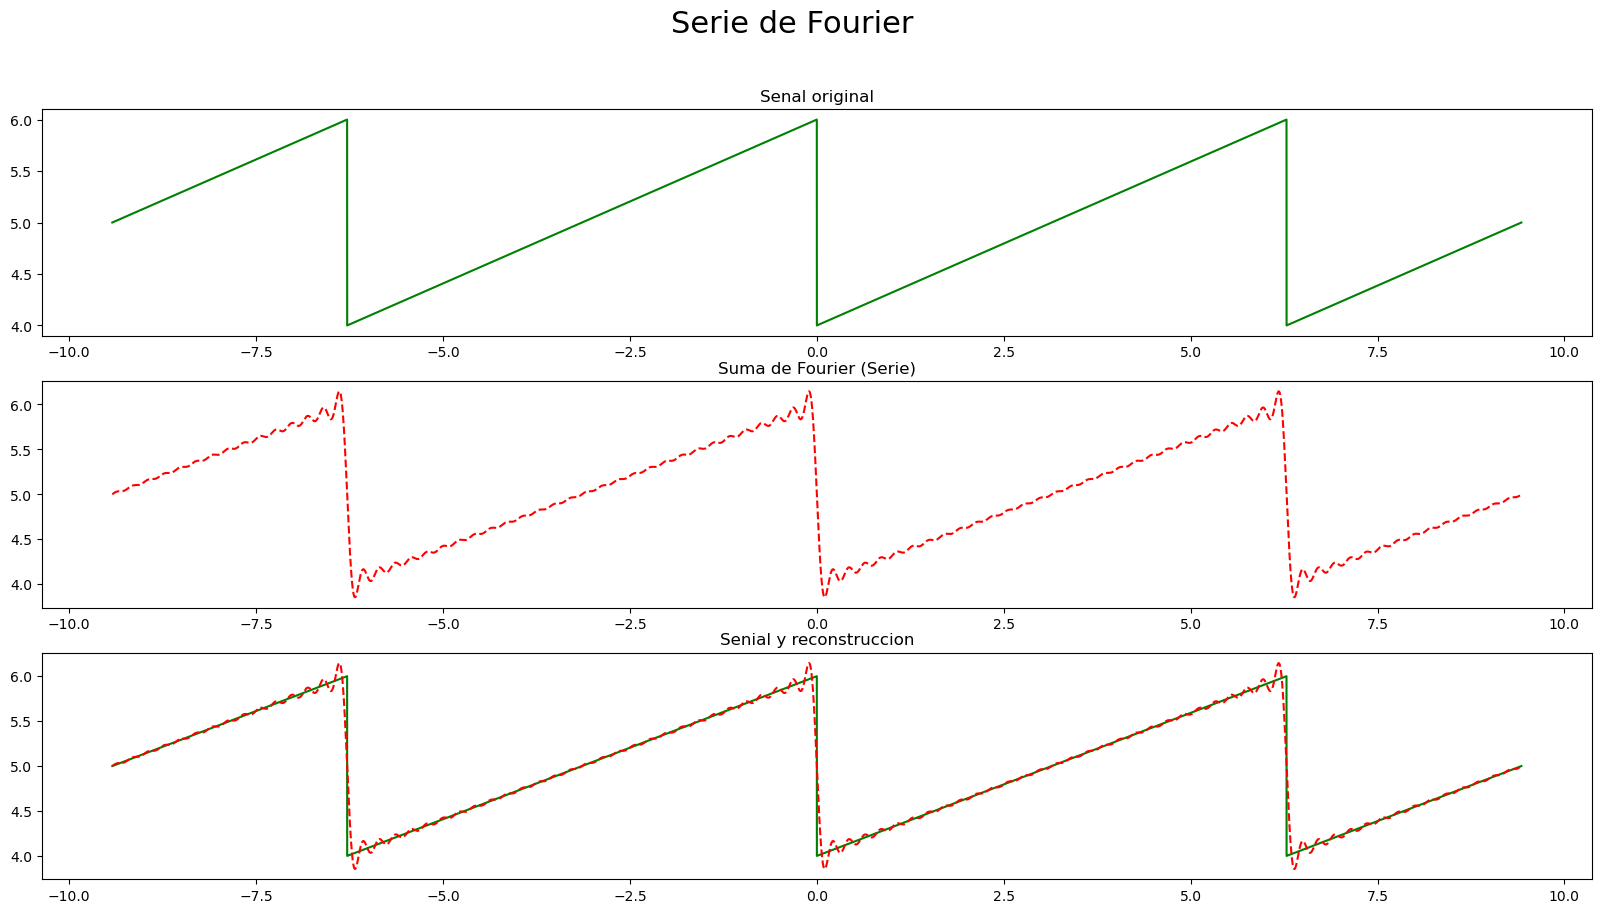

In [5]:
fig, ax = plt.subplots(3,1)
fig.suptitle('Serie de Fourier', fontsize=22)
fig.set_size_inches(20, 10)
ax[0].plot(t,y,'g')
ax[0].set_title("Senal original")
ax[1].plot(t,sum,'r--')
ax[1].set_title("Suma de Fourier (Serie)")
ax[2].plot(t,y,'g')
ax[2].plot(t,sum,'r--')
ax[2].set_title("Senial y reconstruccion")
plt.show()

Espectro de la Serie de Fourier

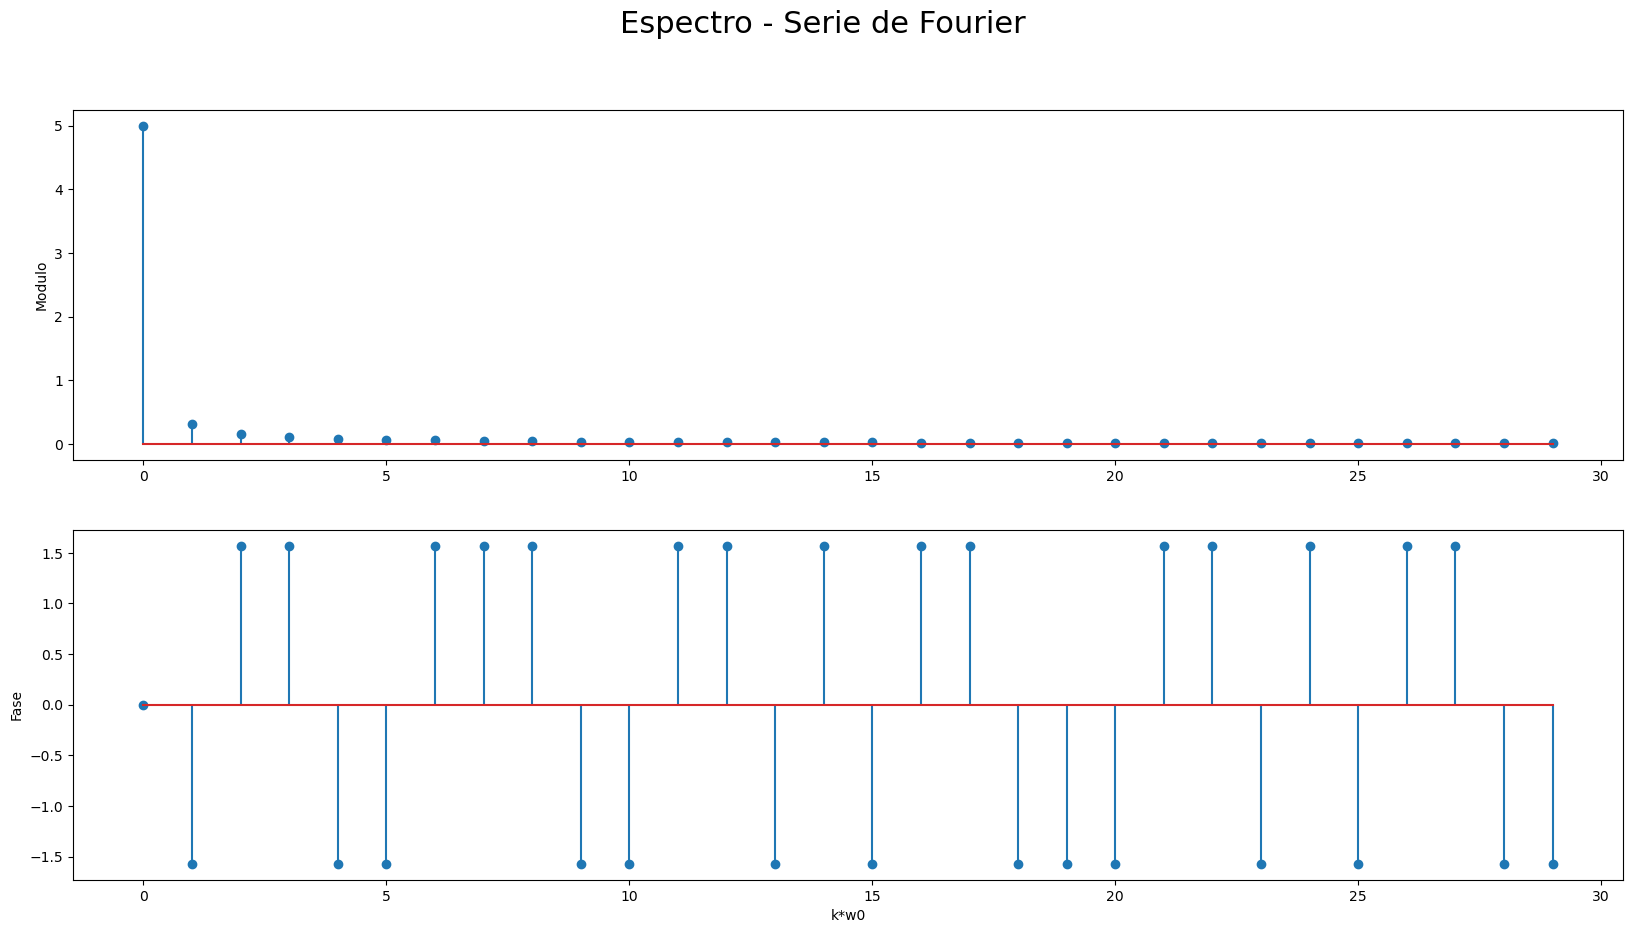

In [6]:
Xn_modulo = [np.sqrt(np.power(np.array(An)/2,2) + np.power(np.array(Bn)/2,2))]
Xn_modulo = np.insert(Xn_modulo, 0, np.abs(a0)) 
Xn_fase = np.arctan(np.array(Bn)/np.array(An))
Xn_fase = np.insert(Xn_fase, 0, np.angle(a0))

fig, ax = plt.subplots(2,1)
fig.suptitle('Espectro - Serie de Fourier', fontsize=22)
fig.set_size_inches(20, 10)
ax[0].stem(Xn_modulo)
ax[0].set_ylabel("Modulo")
ax[1].stem(Xn_fase)
ax[1].set_ylabel("Fase")
ax[1].set_xlabel("k*w0")
plt.show()